Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [58]:
import pandas as pd

# Read Foursquare and Yelp data saved from "yelp_foursquare_EDA" notebook into a dataframe
FSQ_df = pd.read_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\FSQ_data.csv', index_col=0)
FSQ_df.head()


yelp_df = pd.read_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\Yelp_data.csv', index_col=0)
yelp_df.head()

,alias,title,poi_id,poi_name,poi_distance,poi_location.address1,poi_rating,free_bikes,station_lat,station_long
0,mexican,Mexican,gjWtb3F23YxfYvRHWbvWWA,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
1,breakfast_brunch,Breakfast & Brunch,gjWtb3F23YxfYvRHWbvWWA,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
2,italian,Italian,Zm29bLI2eYCevnse4n2U1g,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781
3,latin,Latin American,Zm29bLI2eYCevnse4n2U1g,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781
4,bars,Bars,Zm29bLI2eYCevnse4n2U1g,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781


In [59]:
#rename columns to meaningful names
yelp_df.rename(columns = {'alias':'category_alias', 'title':'category_title'}, inplace = True) 

In [60]:
combined_df=yelp_df[['category_alias','category_title','poi_name','poi_distance','poi_location.address1','poi_rating','free_bikes','station_lat','station_long']]

combined_df.rename(columns = {'poi_location.address1':'poi_address'}, inplace = True) 


In [61]:
fsq_subset_df = FSQ_df[['short_name','name','poi_name','poi_distance','poi_location.address','free_bikes','station_lat','station_long']]
#fsq_subset_df

#rename columns to match final joined dataset
fsq_subset_df.rename(columns = {'short_name':'category_alias', 'name':'category_title','poi_location.address':'poi_address'}, inplace = True) 

combined_df=pd.concat([combined_df, fsq_subset_df], ignore_index = True)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26060 entries, 0 to 26059
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_alias  26060 non-null  object 
 1   category_title  26060 non-null  object 
 2   poi_name        26060 non-null  object 
 3   poi_distance    26060 non-null  float64
 4   poi_address     25711 non-null  object 
 5   poi_rating      18905 non-null  float64
 6   free_bikes      26060 non-null  float64
 7   station_lat     26060 non-null  float64
 8   station_long    26060 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.8+ MB


In [63]:
combined_df.describe()

,poi_distance,poi_rating,free_bikes,station_lat,station_long
count,26060.000000,18905.000000,26060.000000,26060.000000,26060.000000
mean,673.416866,4.039540,8.517268,-71.083426,42.362872
std,2360.768165,0.481277,6.209096,0.050445,0.043837
min,4.000000,1.000000,0.000000,-71.213822,42.255600
25%,239.000000,4.000000,3.000000,-71.111337,42.341356
50%,446.986663,4.000000,8.000000,-71.087567,42.361257
75%,769.381407,4.500000,12.000000,-71.063187,42.381001
max,86568.563935,5.000000,39.000000,-70.886930,42.529900


In [64]:
combined_df.shape

(26060, 9)

In [65]:
# percentage of missing values in each column
round(100 * (combined_df.isnull().sum()/len(combined_df)),2).sort_values(ascending=False)

poi_rating        27.46
poi_address        1.34
category_alias     0.00
category_title     0.00
poi_name           0.00
poi_distance       0.00
free_bikes         0.00
station_lat        0.00
station_long       0.00
dtype: float64

In [67]:
combined_df['poi_rating'].isnull().sum()

7155

In [69]:
# Drop rows where the 'poi_rating' column is null
combined_df = combined_df.dropna(subset=['poi_rating'])

In [71]:
print(combined_df.shape)

# percentage of missing values in each column again
round(100 * (combined_df.isnull().sum()/len(combined_df)),2).sort_values(ascending=False)

#poi_address has some null values but it is not relevant very relevant for the analysis

(18905, 9)


poi_address       1.3
category_alias    0.0
category_title    0.0
poi_name          0.0
poi_distance      0.0
poi_rating        0.0
free_bikes        0.0
station_lat       0.0
station_long      0.0
dtype: float64

In [72]:
#duplicate check
combined_df_d=combined_df.copy()
combined_df_d.drop_duplicates(subset=None, inplace=True)
combined_df_d.shape
#same record count, no duplicates found

(18905, 9)

In [73]:
combined_df.shape

(18905, 9)

In [74]:
analysis_df=combined_df[['poi_name','poi_address','poi_distance','poi_rating','free_bikes','category_alias','category_title']]

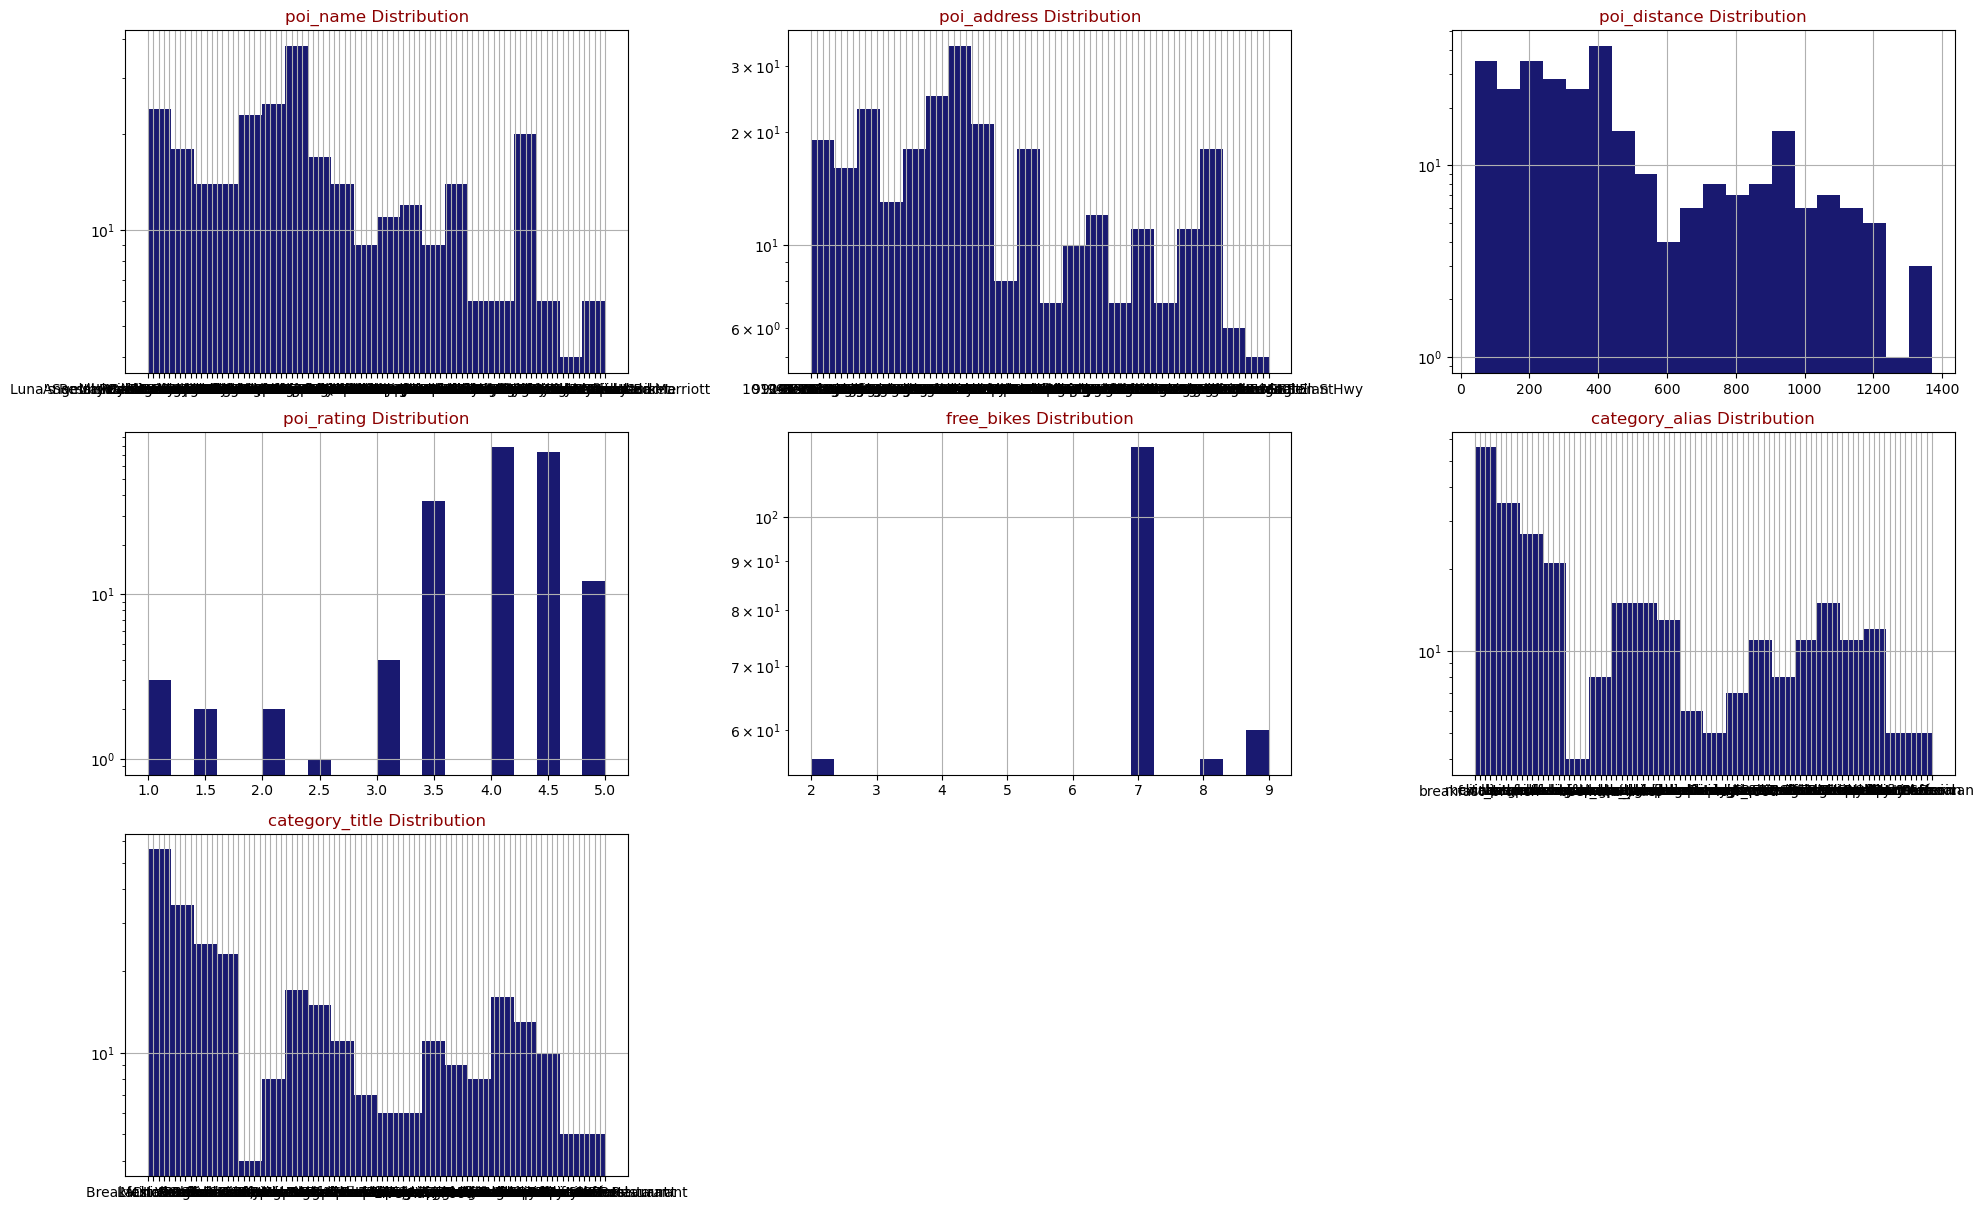

In [52]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(analysis_df,analysis_df.columns,5,3)

In [75]:
#save the final combined dataset into a csv file

combined_df.to_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\Combined_POI_data.csv')

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [76]:
import sqlite3
from sqlite3 import Error

#function to create connection
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\BikesharePOI.db')

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [77]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS poi_data (
  category_alias  TEXT,
  category_title TEXT,
  poi_name TEXT,
  poi_distance FLOAT,
  poi_address  TEXT,
  poi_rating   FLOAT,
  free_bikes   FLOAT,
  station_lat  FLOAT,
  station_long FLOAT
);
"""

#function to run queries using connections created and query passed as argument
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        
execute_query(connection, create_table_sql)  

Query executed successfully


In [78]:
combined_df.to_sql(name="poi_data",con=connection,if_exists='replace',index=False)

18905

In [36]:
combined_df.head()

,category_alias,category_title,poi_name,poi_distance,poi_address,poi_rating,free_bikes,station_lat,station_long
0,mexican,Mexican,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,NaN,NaN,NaN
1,breakfast_brunch,Breakfast & Brunch,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,NaN,NaN,NaN
2,chinese,Chinese,Little Asia Restaurant,94.503416,991 Bennington St,4.0,NaN,NaN,NaN
3,italian,Italian,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,NaN,NaN,NaN
4,latin,Latin American,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,NaN,NaN,NaN
